# Data Visualisation Challenge
**Objective: Understand the economics underlying Hollywood movies through the use of data visualisations.**
The data was retrieved from https://github.com/jgoodall/cinevis/blob/master/data/csvs/moviedata.csv
**This project is based on the Dataquest *Data Visualization* challenge.**
## Environment Setup and Data Cleaning
Let's start by setting up our environment and importing the data.

In [2]:
# Import necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/opt/ds/lib/python3.4/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
# Import the data
hollywood_movies = pd.read_csv("hollywood_movies.csv")

We can now take a first look at our data.

In [4]:
# Display the first 5 rows of the DataFrame
hollywood_movies.head()

,Year,exclude,Film,Lead Studio,Critic Rating,Audience Rating,Story,Genre,Opening Weekend Theaters,Opening Weekend per Cinema,Domestic Gross,Foreign Gross,Worldwide Gross,Budget,Profitability,Opening Weekend Revenue,Oscar
0,2011,NaN,Average,NaN,52.84,61.42,NaN,NaN,2810.31,8764.92,61.33,93.53,144.86,52.25,3.4200,20.14,NaN
1,2011,NaN,The Tree Of Life,Independant,84.00,61.00,Discovery,Drama,4.00,93230.00,13.30,41.00,54.30,32.00,1.6970,0.37,NaN
2,2011,NaN,Midnight in Paris,Sony,93.00,84.00,Love,Romance,944.00,61777.00,56.18,83.00,139.18,17.00,8.1869,5.83,NaN
3,2011,NaN,Harry Potter and the Deathly Hallows Part 2,Warner Bros,96.00,92.00,Rivalry,Fantasy,4375.00,38672.00,381.01,947.10,1328.11,125.00,10.6249,169.19,NaN
4,2011,NaN,Twilight: Breaking Dawn,Independant,26.00,68.00,Love,Romance,4061.00,34012.00,260.80,374.00,634.80,110.00,5.7709,138.12,NaN


Let's take a look at the exclude column, for which the first 5 rows contain missing values.

In [5]:
# Select the exclude colum and display its distribution
hollywood_movies["exclude"].value_counts()

Series([], Name: exclude, dtype: int64)

The exclude column only contains missing values, so we can remove it from the DataFrame.

In [6]:
# Remove the exclude column
hollywood_movies.drop("exclude", axis=1, inplace=True)

## Scatter Plots – Profitability and Audience Ratings
Let's explore the relationship between a movie's profitability and its audience rating.

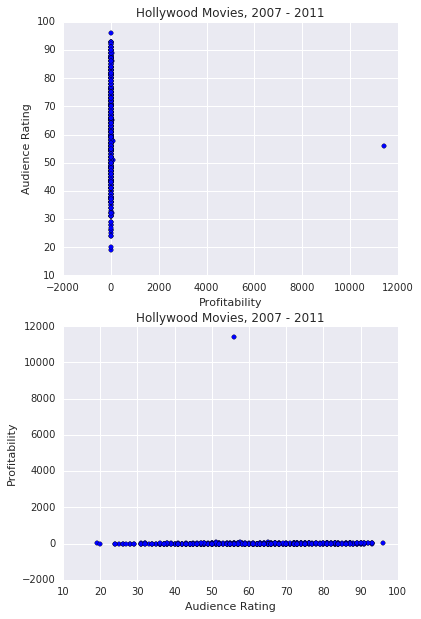

In [7]:
# Generate a figure of size (6,10)
fig = plt.figure(figsize=(6,10))
# Generate two vertically oriented subplots
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

# In the top subplot, create a scatter plot with Profitability on the x-axis and Audience Rating on the y-axis
ax1.scatter(hollywood_movies["Profitability"], hollywood_movies["Audience Rating"])
# Set the x- and y-axis labels
ax1.set_xlabel("Profitability")
ax1.set_ylabel("Audience Rating")

# In the bottom subplot, create the reverse scatter plot
ax2.scatter(hollywood_movies["Audience Rating"], hollywood_movies["Profitability"])
# Set the x- and y-axis labels
ax2.set_xlabel("Audience Rating")
ax2.set_ylabel("Profitability")

# Set the title of both subplots to "Hollywood Movies, 2007-2011"
ax1.set_title("Hollywood Movies, 2007 - 2011")
ax2.set_title("Hollywood Movies, 2007 - 2011")

# Display the plots
plt.show()

Because of the outlier (*Paranormal Activity*), the plots aren't very useful. Let's remove this row and explore this relationship again.
## Scatter Matrix – Profitability and Audience Ratings
Let's filter out *Paranormal Activity* and create a scatter matrix of the Profitability and Audience Rating columns.

In [8]:
# Create a copy of the DataFrame where the row containing Paranormal Activity in the Film column is removed
normal_movies = hollywood_movies[hollywood_movies["Film"] != "Paranormal Activity"]

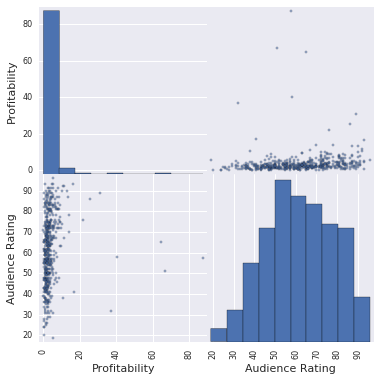

In [9]:
# Generate a scatter matrix of Profitability vs Audience Rating
pd.scatter_matrix(normal_movies[["Profitability", "Audience Rating"]], figsize=(6,6))

# Display the scatter matrix
plt.show()

There seems to be a slight positive correlation between Audience Rating and Profitability. However, this correlation seems very light. Let's check how the columns correlate exactly.

In [10]:
# Compute the correlation between the Profitability and Audience Rating columns
normal_movies[["Profitability", "Audience Rating"]].corr()

,Profitability,Audience Rating
Profitability,1.000000,0.114385
Audience Rating,0.114385,1.000000


Indeed, there is a positive correlation but it is practically insignificant.
## Box Plot – Audience and Critic Ratings
Let's compare the distribution of audience and critic ratings using a box plots.

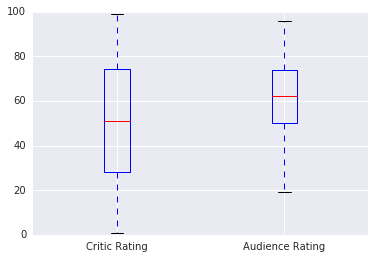

In [11]:
# Generate a box plot of both columns
normal_movies[["Critic Rating", "Audience Rating"]].plot(kind="box")

# Display the plot
plt.show()

The median Critic Rating is lower than that of Audience Ratings. Critic ratings (ranging from ~0 to ~100) are more spread out than audience ratings (ranging from ~20 to ~95).
## Box Plot - Critic vs Audience Ratings Per Year
Let's explore how this distribution evolved over the years.

/opt/ds/lib/python3.4/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


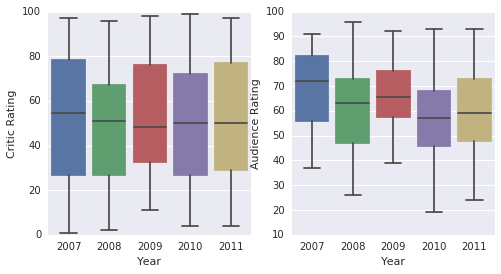

In [21]:
# Sort the values in normal_movies by year
normal_movies = normal_movies.sort_values("Year")

# Create a figure instance and set its size to (8,4)
fig = plt.figure(figsize=(8,4))

# Create two horizontally-oriented subplots
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# LEFT SUBPLOT
# Generate a box plot of Critic Rating for each Year, using Seaborn's boxplot function
sns.boxplot(data=normal_movies, x="Year", y="Critic Rating", ax=ax1)

# RIGHT SUBPLOT
# Generate a box plot of Audience Rating for each Year, using Seaborn's boxplot function
sns.boxplot(data=normal_movies, x="Year", y="Audience Rating", ax=ax2)

# Display the plots
plt.show()

Critic ratings are more consistent over the years; however they are also more spread out than audience ratings. These tend to very more over the years (perhaps being more influenced by single, popular movies).

## Box Plots - Profitable vs Unprofitable Movies
Let's explore the role of ratings in the profitability (or unprofitability) of movies. From Dataquest:

In [22]:
# Define a function called is_profitable which takes a row as argument
def is_profitable(row):
    # If the Profitability value for the given row is lesser than or equal to 1
    if row["Profitability"] <= 1.0:
        # Return False
        return False
    # Return True (implicit else)
    return True
# Apply is_profitable to normal_movies, row by row, and store the output in a new column Profitable
normal_movies["Profitable"] = normal_movies.apply(is_profitable, axis=1)
# Print the distribution of the new Profitable column
print(normal_movies["Profitable"].value_counts())

True     447
False     69
Name: Profitable, dtype: int64


/opt/ds/lib/python3.4/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


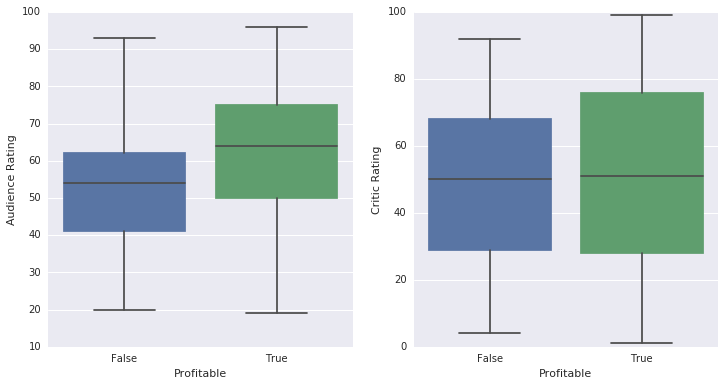

In [106]:
# Create a figure instance of size (12,6)
fig = plt.figure(figsize=(12,6))

# Add 2 horizontally-oriented subplots
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# LEFT SUBPLOT
# Generate a boxplot for Audience Rating, for profitable and unprofitable movies
sns.boxplot(data=normal_movies, x="Profitable", y="Audience Rating", ax=ax1)

# RIGHT SUBPLOT
# Generate a boxplot for Critic Rating, for profitable and unprofitable movies
sns.boxplot(data=normal_movies, x="Profitable", y="Critic Rating", ax=ax2)

# Display the plots
plt.show()

Again, there seems to be a slight correlation between audience rating and profitability (i.e. profitable films tend to receive higher audience ratings – or vice-versa). It's interesting to note that extreme ratings are similar for profitable and non-profitable movies. Critic ratings are not correlated with profitability.